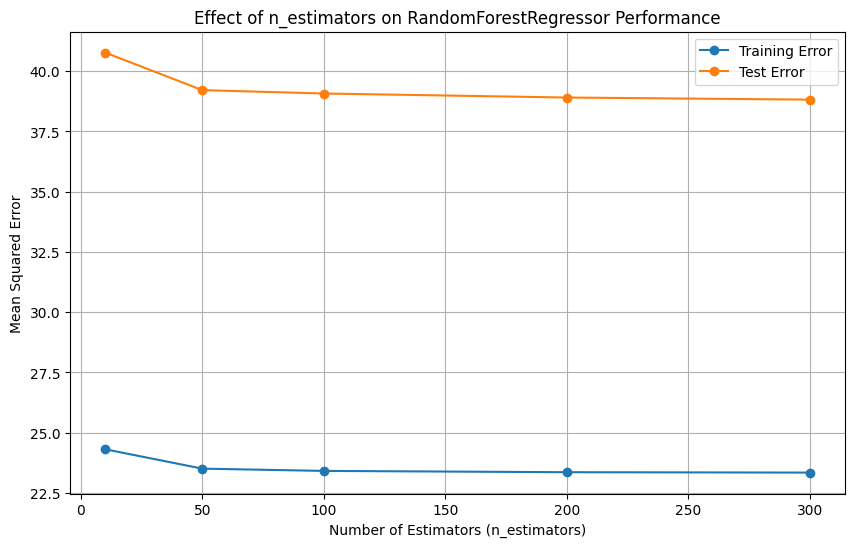

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('gym_data.csv')

# Preprocess the data
X = data.drop(['number_people', 'date', 'timestamp'], axis=1)
y = data['number_people']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['day_of_week', 'month'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analyze the effect of n_estimators by training models with different values
n_estimators_list = [10, 50, 100, 200, 300]
train_errors = []
test_errors = []

for n_estimators in n_estimators_list:
    # Train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute the mean squared error for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Visualize the effect of n_estimators on the performance
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_errors, label='Training Error', marker='o')
plt.plot(n_estimators_list, test_errors, label='Test Error', marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of n_estimators on RandomForestRegressor Performance')
plt.legend()
plt.grid(True)
plt.show()
